# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

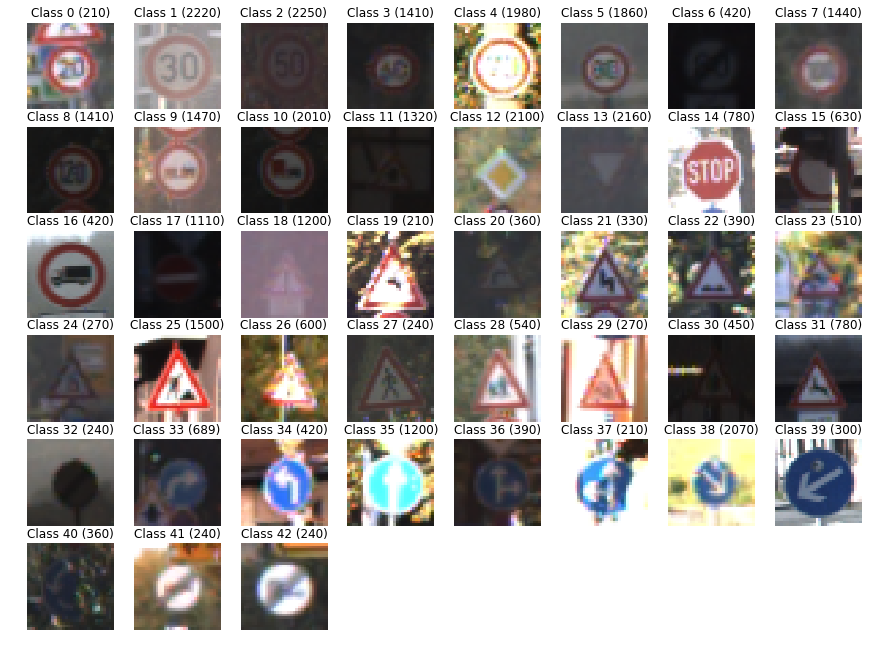

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def display_image_per_class(X_train, y_train):
    # Get the unique classes and counts of each class
    unique_classes, idx, counts = np.unique(y_train, return_index=True, return_counts=True)
    plt.figure(figsize=(15,15))
    i = 1
    # For each unique class in dataset, display an image and number of occurances of that class
    for sign_class in unique_classes:
        image = X_train[idx[i-1]]
        plt.subplot(8,8,i)
        plt.axis('off')
        plt.title("Class {0} ({1})".format(sign_class, counts[i-1]))
        i += 1
        plt.imshow(image)
    plt.show()
    return

display_image_per_class(X_train, y_train)

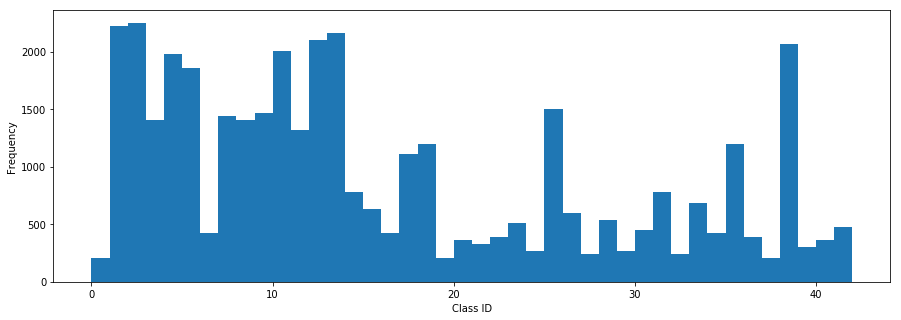

In [4]:
# Display distribution of classes
def display_class_dist(y_train, n_classes):
    plt.figure(figsize=(15,5))
    plt.xlabel("Class ID")
    plt.ylabel("Frequency")
    plt.hist(y_train, bins=n_classes-1)
    plt.show()
    
display_class_dist(y_train, n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

# scale images to values between -0.5 to 0.5
def preprocess_data(data):
    data_norm = []
    for i in range(len(data)):
        image = data[i]
        image[:,:,0] = cv2.equalizeHist(image[:,:,0])
        image[:,:,1] = cv2.equalizeHist(image[:,:,1])
        image[:,:,2] = cv2.equalizeHist(image[:,:,2])
        image = image/255.-.5
        data_norm.append(image)
    return np.array(data_norm, dtype=np.float32())

X_train_norm = preprocess_data(X_train)
X_test_norm = preprocess_data(X_test)

In [6]:
print("MAX before train normalization = {0}".format(np.amax(X_train)))
print("MIN before train normalization = {0}".format(np.amin(X_train)))
print("MAX after train normalization  = {0:.3}".format(np.amax(X_train_norm)))
print("MIN after train normalization  = {0:.3}".format(np.amin(X_train_norm)))
print()
print("MAX before test normalization = {0}".format(np.amax(X_test)))
print("MIN before test normalization = {0}".format(np.amin(X_test)))
print("MAX after test normalization  = {0:.3}".format(np.amax(X_test_norm)))
print("MIN after test normalization  = {0:.3}".format(np.amin(X_test_norm)))

# TODO: Number of training examples
n_train_norm = len(X_train_norm)

# TODO: Number of testing examples.
n_test_norm = len(X_test_norm)

# TODO: What's the shape of a traffic sign image?
image_shape_norm = X_train_norm[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes_norm = len(set(y_train))

print("Number of training examples =", n_train_norm)
print("Number of testing examples =", n_test_norm)
print("Image data shape =", image_shape_norm)
print("Number of classes =", n_classes_norm)

MAX before train normalization = 255
MIN before train normalization = 0
MAX after train normalization  = 0.5
MIN after train normalization  = -0.5

MAX before test normalization = 255
MIN before test normalization = 0
MAX after test normalization  = 0.5
MIN after test normalization  = -0.5
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I scaled the data down to values [-0.5:0.5], which increases training time and reduces the chances of getting stuck in a local optima. I also applied OpenCV's equalizeHist function to increase the contrast of the images. Histogram equalization is most useful on images with backgrounds and foregrounds that are bright or dark, and applying it to this dataset can help with images of signs which may be affected by sun glare, rain, or other sub-optimal conditions.

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

def transform_image(image):
    rows, cols, _ = image.shape
    
    # perform translation on image
    x_shift = np.random.uniform(-2.0,2.0)
    y_shift = np.random.uniform(-2.0,2.0)
    M = np.float32([[1,0,x_shift],[0,1,y_shift]])
    img = cv2.warpAffine(image,M,(cols,rows))
    
    # rotate image
    angle = np.random.uniform(-15.0,15.0)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img = cv2.warpAffine(img,M,(cols,rows))
    
    return img

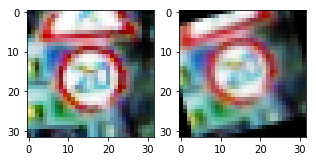

In [8]:
img = X_train[0]
tran_img = transform_image(img)
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(tran_img)

In [9]:
def generate_data(X_train, y_train):
    X_new = []
    y_new = []
    n = len(X_train)
    for i in range(n):
        for j in range(5):
            X_new.append(transform_image(X_train[i]))
            y_new.append(y_train[i])
    X_new = np.array(X_new, dtype=np.float32())
    y_new = np.array(y_new, dtype=np.float32())
    
    return X_new, y_new

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# shuffle data and split into train and validation sets
def train_validation_split(X_train, y_train):
    X_train_set = []
    y_train_set = []
    X_validation_set = []
    y_validation_set = []
    length = len(X_train)
    for i in range(0,length-30,30):
        idx = np.random.randint(i, high=i+30)
        for j in range(30):
            if i+j == idx:
                X_validation_set.append(X_train[i+j])
                y_validation_set.append(y_train[i+j])
            else:
                X_train_set.append(X_train[i+j])
                y_train_set.append(y_train[i+j])
                
    X_train_set = np.array(X_train_set, dtype=np.float32())
    y_train_set = np.array(y_train_set, dtype=np.float32())
    X_validation_set = np.array(X_validation_set, dtype=np.float32())
    y_validation_set = np.array(y_validation_set, dtype=np.float32())
    
    return X_train_set, X_validation_set, y_train_set, y_validation_set
                
            
        
#X_train_norm, y_train = shuffle(X_train_norm, y_train)
X_train_norm, X_validation, y_train, y_validation = train_validation_split(X_train_norm, y_train)

# Generate additional data
X_new, y_new = generate_data(X_train_norm, y_train)

# Add new data to training set
X_train_norm = np.vstack((X_train_norm, X_new))
y_train = np.append(y_train, y_new)

assert(len(X_train_norm) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test_norm) == len(y_test))

print()
print("Image Shape: {}".format(X_train_norm[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train_norm)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test_norm)))


Image Shape: (32, 32, 3)

Training Set:   227244 samples
Validation Set: 1306 samples
Test Set:       12630 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Following the strategy of the above linked paper by Pierre Sermanet and Yan LeCun, I split the data into training and validation sets by randomly picking an image at 30 step intervals to use as the validation set. I did this because according to the paper: "Traffic sign examples in the GTSRB dataset were extracted from 1-second video sequences, i.e. each real-world instance yields 30 samples with usually increasing resolution as the camera is approaching the sign." Therefore, by taking one sample from each video clip the validation will more accurately represent the performance of an unseen dataset. By separating the dataset this way, my validation set is comprised of 1306 samples. The test set was provided. I also built a jittered dataset by adding 5 transformed versions of the original training set, yielding 227,244 samples in total in the training set. The samples were generated by applying a random degree of rotation between [-15,+15] degrees, and a random shift between [-2,+2] pixels.

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1_W, conv1_b, conv2_W, conv2_b, fc1_W, fc1_b, fc2_W, fc2_b, fc3_W, fc3_b

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The architecture I used is based on Yan LeCun's famous LeNet-5 architecture, which was presented to us in a previous lab. The network takes a 32x32x3 image as input, and the output is 28x28x6 after applying the first convolution layer with filter size of 5x5 and stride of 1 with zero padding. The ReLu activation function is then applied, followed by max pooling of size 2x2 with stride of 2, which results in output of 14x14x6. Another convolutional layer is then applied with size 5x5 and stride of 1 with zero padding, which results in an output of size 10x10x16. The ReLu activation function is applied again, as well as max pooling of size 2x2 with stride 2 resulting in output size of 5x5x16. The output is then flattened and fed to a fully connected layer which has an output of size 120. Another ReLu activation function is applied and another fully connected layer produces an output of size 84. Again, another ReLu function is applied and a fully connected layer results in an output of size 43, corresponding to the 43 different classes of traffic signs. A detailed image of the network is shown below (Subsampling is performed via max pooling).

![LeNet5](lenet5.png)

In [12]:
### Train your model here.
### Feel free to use as many code cells as needed.

# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [13]:
# Training Pipeline
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.001

logits, conv1_W, conv1_b, conv2_W, conv2_b, fc1_W, fc1_b, fc2_W, fc2_b, fc3_W, fc3_b = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
### Prepare the saver.
save_file = 'lenet'

# Add variables to saver
saver = tf.train.Saver([conv1_W,
                        conv1_b,
                        conv2_W,
                        conv2_b,
                        fc1_W,
                        fc1_b,
                        fc2_W,
                        fc2_b,
                        fc3_W,
                        fc3_b])

# Save placeholders & operations
tf.add_to_collection('x', x)
tf.add_to_collection('y', y)
tf.add_to_collection('logits', logits)
tf.add_to_collection('accuracy_operation', accuracy_operation)

In [16]:
# Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_file)
    print("Model saved")
    
    ### Compute test accuracy
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.953

EPOCH 2 ...
Validation Accuracy = 0.986

EPOCH 3 ...
Validation Accuracy = 0.990

EPOCH 4 ...
Validation Accuracy = 0.990

EPOCH 5 ...
Validation Accuracy = 0.989

EPOCH 6 ...
Validation Accuracy = 0.990

EPOCH 7 ...
Validation Accuracy = 0.992

EPOCH 8 ...
Validation Accuracy = 0.992

EPOCH 9 ...
Validation Accuracy = 0.992

EPOCH 10 ...
Validation Accuracy = 0.994

EPOCH 11 ...
Validation Accuracy = 0.993

EPOCH 12 ...
Validation Accuracy = 0.994

EPOCH 13 ...
Validation Accuracy = 0.994

EPOCH 14 ...
Validation Accuracy = 0.991

EPOCH 15 ...
Validation Accuracy = 0.995

EPOCH 16 ...
Validation Accuracy = 0.992

EPOCH 17 ...
Validation Accuracy = 0.991

EPOCH 18 ...
Validation Accuracy = 0.995

EPOCH 19 ...
Validation Accuracy = 0.995

EPOCH 20 ...
Validation Accuracy = 0.993

Model saved
Test Accuracy = 0.959


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** In training my model, I used the Adam Optimizer, a batch size of 256, 20 epochs, learning rate of 0.001, mu of 0, and sigma of 0.1.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** To arrive at my current solution, I started with a vanilla LeNet architecture which was presented in the previous LeNet lab. Without any modifications this architecture achieved a test accuracy of 86%. I then began to experiment with the preprocessing and normalization strategies described in the Sermanet and LeCun publication linked above. My goal was to see just how much a difference these preprocessing techniques could make without changing the main architecture. With just scaling the data the accuracy improved to about 88%, and after applying histogram equalization accuracy rose to about 90%. The biggest increase in accuracy was due to creating the additional "jittered" data, which brought the accuracy to over 94%. After experimenting with some hyperparameters, I saw an increase of about 1% by increasing the batch size to 256 from the original 128 and increasing the number of epochs from 10 to 20. I was able to achieve test accuracy over 95% by applying preprocessing techniques, adding data, and hyperparamter tuning, while keeping the basic architecture unchanged. Although it is not quite state of the art, I found the LeNet architecture suitable for learning because of it's simplicity, and I was able to experience first hand how different preprocessing, normalization, and increasing data can affect a model.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import numpy as np
import csv
import cv2
import os
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def get_class_id_name_pairs(filename):
    class_dict = {}
    with open(filename) as f:
        csv_reader = csv.reader(f)
        id_name_pairs = [(int(r[0]),r[1]) for r in csv_reader if r[0]!='ClassId']
        class_dict = dict(id_name_pairs)
    return class_dict

def load_and_resize_images(folder):
    image_names = sorted(os.listdir(folder))
    bgr_images = [cv2.imread(folder + "/" + name) for name in image_names]
    rgb_images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in bgr_images]
    resized_images = [cv2.resize(img, (32, 32)) for img in rgb_images]
    return np.array(resized_images)

def display_new_images(images):
    plt.figure(figsize=(8, 8))
    i = 1
    for image in images:
        plt.subplot(1, 5, i)
        plt.axis('off')
        plt.title("Sample #{0}".format(i))
        plt.imshow(image)
        i += 1
    plt.show()
    return

Loaded 43 label names.
Loaded 5 images of size (32, 32, 3).



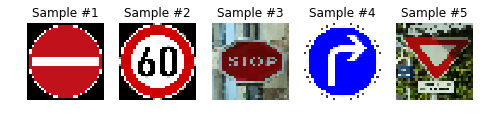

In [18]:
# Load the class id's and names
class_dict = get_class_id_name_pairs('signnames.csv')

# Load the new scaled images
images = load_and_resize_images("new-images")
images = np.array(images)

# Assign the correct classes to new images
image_classes = np.array([17, 3, 14, 33, 13])

# Number of images
num_images = images.shape[0]

# Image Shape
image_shape = images.shape[1:]

print("Loaded {0} label names.".format(len(class_dict)))
print("Loaded {0} images of size {1}.".format(num_images, image_shape))
print()

display_new_images(images)

In [19]:
images_norm = preprocess_data(images)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The images don't seem to pose any difficulty for classification, so I expect good results from my model.

In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
### Credit to Stefano Martinallo for providing explanation and code on how to save/restore models on slack

save_file = './lenet'

tf.reset_default_graph()

with tf.Session() as sess:
    # Restore the model
    new_saver = tf.train.import_meta_graph(save_file + '.meta')
    new_saver.restore(sess, save_file)
    print("Model restored")

    # Restore the placeholder
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    print("Placeholder restored")

    # Restore the operations
    logits = tf.get_collection('logits')[0]
    accuracy_operation = tf.get_collection('accuracy_operation')[0]
    print("Operations restored")

    all_vars = tf.trainable_variables()
    print("Restored {0} variables".format(len(all_vars)))

    # Run the model
    predictions = sess.run(logits, feed_dict={x: images_norm})
    classes = np.argmax(predictions, axis=1)

    accuracy = sess.run(accuracy_operation, feed_dict={x: images_norm, y: image_classes})
    print()
    print("Accuracy on the new images = {:.3f}".format(accuracy))

Model restored
Placeholder restored
Operations restored
Restored 10 variables

Accuracy on the new images = 0.800


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** My model performed resonably well on the small dataset I provided. It correctly classified with high confidence 4 of the 5 images. This is well below the test accuracy of the original dataset, but more data and a bit of tweaking could close the gap.

In [21]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
probabilities = tf.placeholder(tf.float32, (None, 43))

with tf.Session() as sess:
    top_k_probs = sess.run(tf.nn.top_k(tf.nn.softmax(probabilities), k=5), feed_dict={probabilities: predictions})
    print("top_k probabilities stored in 'top_k_probs' variable.")

top_k_probabilities = top_k_probs[0]
top_k_predictions = top_k_probs[1]

print()
print(top_k_probabilities)
print()
print(top_k_predictions)

top_k probabilities stored in 'top_k_probs' variable.

[[  1.00000000e+00   4.54645885e-08   6.81738976e-09   2.77645418e-09
    2.29510211e-09]
 [  9.24927235e-01   7.49533027e-02   1.19513221e-04   3.36037903e-12
    5.22903227e-13]
 [  9.99968052e-01   3.19302453e-05   1.90764848e-10   1.69162129e-10
    5.13252531e-11]
 [  1.00000000e+00   5.61215267e-21   2.36132964e-25   1.55395922e-25
    8.35140617e-28]
 [  9.96622562e-01   3.37733072e-03   5.35080105e-08   6.63170940e-09
    4.02705602e-09]]

[[17 10 12 32 41]
 [ 6  1  2 18  5]
 [14 17 26 12  5]
 [33 40 35  6 12]
 [13 14 10 12 17]]


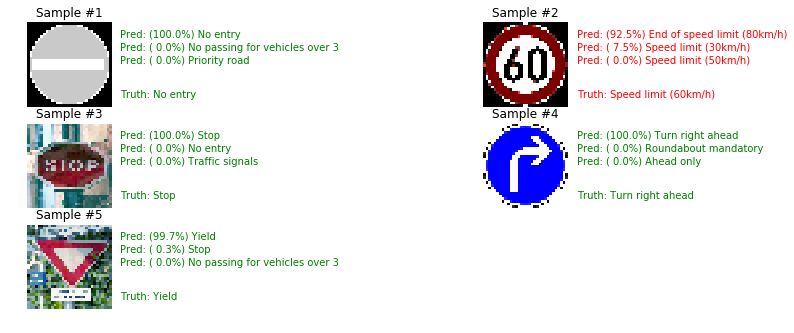

In [22]:
# Display the predictions and the ground truth visually.
# Code for showing prediction % next to each image adapted from github.com/Nallo
fig = plt.figure(figsize=(15, 22))
for i in range(len(predictions)):
    truth = image_classes[i]
    prediction = classes[i]
    plt.subplot(12, 2, 1+i)
    plt.title("Sample #{0}".format(i+1))
    plt.axis('off')
    color = 'green' if truth == prediction else 'red'

    # Plot the top 3 probabilities on the side of the image
    for j in range(3):
        pred_label = class_dict[top_k_predictions[i][j]]
        pred_certainty = top_k_probabilities[i][j]
        plt.text(35, 5*(j+1), "Pred: ({0:4.1f}%) {1:.30}".format(100*pred_certainty, pred_label), color=color)

    # Plot the truth label
    plt.text(35, 28, "Truth: {0:.30}".format(class_dict[truth]), color=color)
    plt.imshow(images[i])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Surprisingly, my model had a very high certainty of all of its predictions, even the one that it misclassified. It had no trouble correctly classifying a 'No Entry' sign, a 'Turn right ahead' sign, and a 'Stop' sign with 100% confidence, and correctly classified the 'Yield' sign with 99.7% confidence. Strangely, it had trouble classifying the 'Speed limit (60km/h)' as it classified it as a 'Speed limit (80km/h)' sign with 92.5% confidence with other speed limit signs making the top 3, but not the 60km/h sign. The reason I think that is strange is because the architecture I used is based on the famous LeNet model which was used to classify digits for sorting mail by zip codes, and the only trouble it seemed to have was classifying the different speed limits, although it was confident it was a speed limit sign in genereal.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.